# Practice3 (test_submission1_4, 2_4.csv)
> Public Score
> - test_submission1_3: 25136.09206
> - test_submission2_3: 28583.13469

In [145]:
import sys, os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# column 보기 30개로 설정
pd.set_option('display.max_columns', 30)

In [146]:
# 데이터 경로 설정
file_path = os.path.join("c:\\Users\\prohe\\OneDrive\\바탕 화면\\알고리즘PBL2\\", 'data')
train_origin = pd.read_csv(file_path+'\dataset.csv')
test_origin = pd.read_csv(file_path+'\problem.csv')

In [147]:
train_origin.shape, test_origin.shape

((1340, 24), (130, 23))

In [148]:
# 전처리를 위한 원본 데이터 복사
train = train_origin.copy()
test = test_origin.copy()

In [149]:
# 메모리를 효율적으로 사용하기 위한 downcast 함수 정의
def downcast(df, verbose=True):     # verbose 옵션 추가: (True)인 경우 몇 퍼센트 압축됐는지 출력
    start_mem = df.memory_usage().sum() / 1024**2   # 초기 메모리 사용량
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum() / 1024**2

    if verbose:
        print(f'{(100*(start_mem - end_mem) / start_mem):.1f}% 압축됨')

    return df

In [150]:
downcast(train)
downcast(test)

67.2% 압축됨
68.7% 압축됨


,Id,LotArea,Street,LotConfig,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,YrSold
0,1341,11200,Pave,Inside,5,5,1965,1965,1040,1040,0,1040,1,0,3,1,5,0,Detchd,1965,1,384,2008
1,1342,7200,Pave,Corner,5,7,1951,2000,900,900,0,900,1,0,3,1,5,0,Detchd,2005,2,576,2010
2,1343,16905,Pave,Inside,5,6,1959,1959,1350,1328,0,1328,1,1,2,1,5,2,Attchd,1959,1,308,2007
3,1344,9180,Pave,CulDSac,5,7,1983,1983,840,884,0,884,1,0,2,1,5,0,Attchd,1983,2,504,2007
4,1345,7200,Pave,Inside,5,7,1920,1996,530,581,530,1111,1,0,3,1,6,0,Detchd,1935,1,288,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1466,11478,Pave,Inside,8,5,2007,2008,1704,1704,0,1704,2,0,3,1,7,1,Attchd,2008,3,772,2010
126,1467,16321,Pave,CulDSac,5,6,1957,1997,1484,1600,0,1600,1,0,2,1,6,2,Attchd,1957,1,319,2006
127,1468,6324,Pave,Inside,4,6,1927,1950,520,520,0,520,1,0,1,1,4,0,Detchd,1920,1,240,2008
128,1469,8500,Pave,Inside,4,4,1920,1950,649,649,668,1317,1,0,3,1,6,0,Detchd,1920,1,250,2008


# 전처리

In [151]:
# 결측치는 확인해보면 주차장이 모두 없는 경우 이므로 0으로 대체
train['GarageType'].fillna('Nan', inplace=True)
train['GarageYrBlt'].fillna(0, inplace=True)

In [152]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

> 이상치 제거

In [153]:
train = train[train['GrLivArea'] < 4500].reset_index(drop=True)

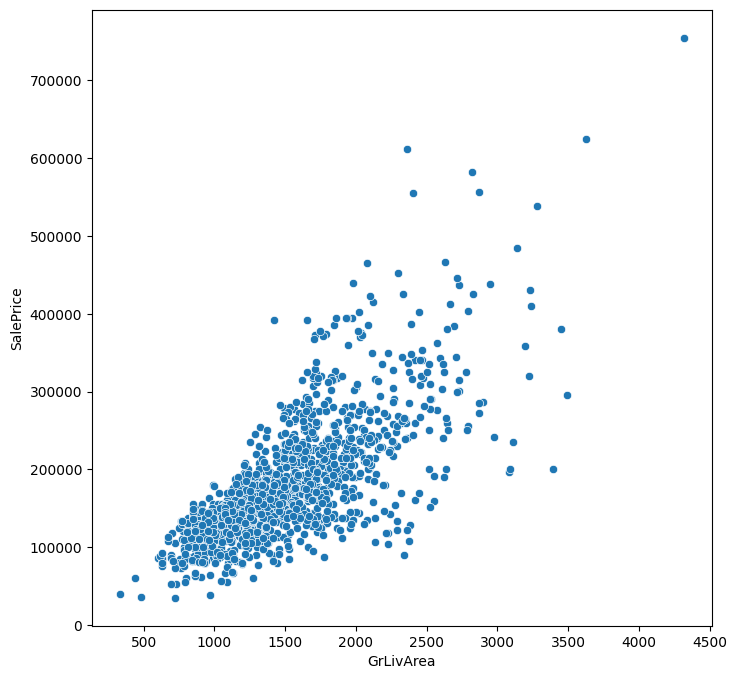

In [154]:
# GrLivArea와 SalePrice scatterplot
plt.figure(figsize=(8, 8))
sns.scatterplot(data=train, x='GrLivArea', y='SalePrice')
plt.show()

In [155]:
# SalePrice 로그 변환
train['SalePrice'] = np.log1p(train['SalePrice'])

In [156]:
# Id는 불필요하므로 삭제
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [157]:
train.duplicated().sum()
train = train.drop_duplicates(keep='first').reset_index(drop=True)  # 중복 데이터 제거

In [158]:
# target과 feature 분리
X_train = train.drop(['SalePrice'], axis=1)
y = train['SalePrice'].reset_index(drop=True)
X_test = test.copy()

In [159]:
# 전처리를 위한 데이터 병합
all_data = pd.concat([X_train, X_test]).reset_index(drop=True)

In [160]:
all_data.shape

(1466, 22)

In [161]:
# 수치형 변수들의 skewness 계수 확인
from scipy.stats import skew

numerical = ['LotArea', 'GrLivArea', '1stFlrSF', '2ndFlrSF']

skew_features = all_data[numerical].apply(lambda x: skew(x)).sort_values(ascending=False)
skew_features

LotArea      12.560030
GrLivArea     1.008735
1stFlrSF      0.890589
2ndFlrSF      0.814647
dtype: float64

In [162]:
# skewed가 높으므로 log1p 변환
all_data[numerical] = np.log1p(all_data[numerical])

In [163]:
all_data

,LotArea,Street,LotConfig,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,YrSold
0,9.042040,Pave,Inside,7,5,2003,2003,856,6.753438,6.751101,7.444833,2,1,3,1,8,0,Attchd,2003.0,2,548,2008
1,9.169623,Pave,FR2,6,8,1976,1976,1262,7.141245,0.000000,7.141245,2,0,3,1,6,1,Attchd,1976.0,2,460,2007
2,9.328212,Pave,Inside,7,5,2001,2002,920,6.825460,6.765039,7.488294,2,1,3,1,6,1,Attchd,2001.0,2,608,2008
3,9.164401,Pave,Corner,7,5,1915,1970,756,6.869014,6.629363,7.448916,1,0,3,1,7,1,Detchd,1998.0,3,642,2006
4,9.565284,Pave,FR2,8,5,2000,2000,1145,7.044033,6.960348,7.695758,2,1,4,1,9,1,Attchd,2000.0,3,836,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,9.348275,Pave,Inside,8,5,2007,2008,1704,7.441320,0.000000,7.441320,2,0,3,1,7,1,Attchd,2008.0,3,772,2010
1462,9.700269,Pave,CulDSac,5,6,1957,1997,1484,7.378384,0.000000,7.378384,1,0,2,1,6,2,Attchd,1957.0,1,319,2006
1463,8.752265,Pave,Inside,4,6,1927,1950,520,6.255750,0.000000,6.255750,1,0,1,1,4,0,Detchd,1920.0,1,240,2008
1464,9.047939,Pave,Inside,4,4,1920,1950,649,6.476973,6.505784,7.183871,1,0,3,1,6,0,Detchd,1920.0,1,250,2008


In [164]:
# 범주형(순서형) 변수 LabelEncoding
from sklearn.preprocessing import LabelEncoder
cols = ['Street', 'OverallCond', 'OverallQual', 'YrSold']

for c in cols:
    encoder = LabelEncoder()
    all_data[c] = encoder.fit_transform(all_data[c])

all_data

,LotArea,Street,LotConfig,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,YrSold
0,9.042040,1,Inside,6,4,2003,2003,856,6.753438,6.751101,7.444833,2,1,3,1,8,0,Attchd,2003.0,2,548,2
1,9.169623,1,FR2,5,7,1976,1976,1262,7.141245,0.000000,7.141245,2,0,3,1,6,1,Attchd,1976.0,2,460,1
2,9.328212,1,Inside,6,4,2001,2002,920,6.825460,6.765039,7.488294,2,1,3,1,6,1,Attchd,2001.0,2,608,2
3,9.164401,1,Corner,6,4,1915,1970,756,6.869014,6.629363,7.448916,1,0,3,1,7,1,Detchd,1998.0,3,642,0
4,9.565284,1,FR2,7,4,2000,2000,1145,7.044033,6.960348,7.695758,2,1,4,1,9,1,Attchd,2000.0,3,836,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,9.348275,1,Inside,7,4,2007,2008,1704,7.441320,0.000000,7.441320,2,0,3,1,7,1,Attchd,2008.0,3,772,4
1462,9.700269,1,CulDSac,4,5,1957,1997,1484,7.378384,0.000000,7.378384,1,0,2,1,6,2,Attchd,1957.0,1,319,0
1463,8.752265,1,Inside,3,5,1927,1950,520,6.255750,0.000000,6.255750,1,0,1,1,4,0,Detchd,1920.0,1,240,2
1464,9.047939,1,Inside,3,3,1920,1950,649,6.476973,6.505784,7.183871,1,0,3,1,6,0,Detchd,1920.0,1,250,2


In [165]:
# 파생변수 생성
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['TotalBath'] = all_data['FullBath'] + (0.5 * all_data['HalfBath'])

all_data['Has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['HasGarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['HasBsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['HasFireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [166]:
all_data.shape

(1466, 28)

In [167]:
# 고유값 확인
print(all_data['LotConfig'].unique())
print(all_data['GarageType'].unique())

['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'Nan' 'Basment' '2Types']


In [168]:
final_data = pd.get_dummies(all_data).reset_index(drop=True)
final_data.shape

(1466, 38)

In [169]:
X_train = final_data.iloc[:len(y), :]
X_test = final_data.iloc[len(y):, :]
X_train.shape, y.shape, X_test.shape

((1336, 38), (1336,), (130, 38))

### 모델링

In [171]:
# 평가지표 정의
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def rmse_cv(model):    
    rmse = np.sqrt(-cross_val_score(model, X_train.values, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [172]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [173]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=10000000, alphas=alphas2, random_state=42, cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=10000000, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)  

In [174]:
from lightgbm import LGBMRegressor

# model_lgb = LGBMRegressor(objective='regression', 
#                                        num_leaves=4,
#                                        learning_rate=0.01, 
#                                        n_estimators=5000,
#                                        max_bin=200, 
#                                        bagging_fraction=0.75,
#                                        bagging_freq=5, 
#                                        bagging_seed=7,
#                                        feature_fraction=0.2,
#                                        feature_fraction_seed=7,
#                                        verbose=-1,
#                                        )

model_lgb = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=42, bagging_seed=42,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [175]:
from xgboost import XGBRegressor

# model_xgb = XGBRegressor(learning_rate=0.01,n_estimators=3460,
#                                      max_depth=3, min_child_weight=0,
#                                      gamma=0, subsample=0.7,
#                                      colsample_bytree=0.7,
#                                      objective='reg:linear', nthread=-1,
#                                      scale_pos_weight=1, seed=27,
#                                      reg_alpha=0.00006)

model_xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,
                             random_state =7, nthread = -1)

In [176]:
from mlxtend.regressor import StackingCVRegressor

stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr),
                                meta_regressor=lasso,
                                use_features_in_secondary=True)

In [180]:
score1 = rmse_cv(ridge)
print("Ridge: {:.4f} ({:.4f})\n".format(score1.mean(), score1.std()), )

score2 = rmse_cv(lasso)
print("LASSO: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()), )

score3 = rmse_cv(elasticnet)
print("elastic net: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()), )

score4 = rmse_cv(KRR)
print("KRR: {:.4f} ({:.4f})\n".format(score4.mean(), score4.std()), )

score5 = rmse_cv(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score5.mean(), score5.std()), )

score6 = rmse_cv(model_lgb)
print("lightgbm: {:.4f} ({:.4f})\n".format(score6.mean(), score6.std()), )

score7 = rmse_cv(gbr)
print("gbr: {:.4f} ({:.4f})\n".format(score7.mean(), score7.std()), )

score8 = rmse_cv(model_xgb)
print("xgboost: {:.4f} ({:.4f})\n".format(score8.mean(), score8.std()), )

model_performances = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'ElasticNet', 'Kernel Ridge', 'SVR', 'LightGBM', 'GradientBoosting', 'XGBoost'],
    'Score': [score1.mean(), score2.mean(), score3.mean(), score4.mean(), score5.mean(), score6.mean(), score7.mean(), score8.mean()],
    'Std': [score1.std(), score2.std(), score3.std(), score4.std(), score5.std(), score6.std(), score7.std(), score8.std()]})

Ridge: 0.1317 (0.0104)

LASSO: 0.1317 (0.0104)

elastic net: 0.1317 (0.0104)

KRR: 0.1317 (0.0104)

SVR: 0.1317 (0.0104)

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [War

In [183]:
print('START Fit')

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X_train), np.array(y))

print('elasticnet')
elastic_model_full_data = elasticnet.fit(X_train, y)

print('Lasso')
lasso_model_full_data = lasso.fit(X_train, y)

print('Ridge')
ridge_model_full_data = ridge.fit(X_train, y)

print('Svr')
svr_model_full_data = svr.fit(X_train, y)

print('KRR')
KRR_model_full_data = KRR.fit(X_train, y)

print('GradientBoosting')
gbr_model_full_data = gbr.fit(X_train, y)

print('xgboost')
xgb_model_full_data = model_xgb.fit(X_train, y)

print('lightgbm')
lgb_model_full_data = model_lgb.fit(X_train, y)

START Fit
stack_gen
elasticnet
Lasso
Ridge
Svr
KRR
GradientBoosting
xgboost
[00:42:09] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

lightgbm
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is s

In [181]:
model_performances

,Model,Score,Std
0,Ridge,0.129971,0.012722
1,Lasso,0.128501,0.012528
2,ElasticNet,0.128630,0.012576
3,Kernel Ridge,0.182880,0.100430
4,SVR,0.130344,0.013423
5,LightGBM,0.131712,0.010392
6,GradientBoosting,0.128918,0.010965
7,XGBoost,0.128479,0.010348


In [186]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.05 * KRR_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.15 * lgb_model_full_data.predict(X)) + \
            (0.2 * stack_gen_model.predict(np.array(X))))

In [187]:
print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X_train)))

RMSLE score on train data:
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
0.09662939285114129


In [188]:
print('RMSLE score on train data:')
print(rmsle(np.expm1(y), np.expm1(blend_models_predict(X_train))))

RMSLE score on train data:
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
18194.071663363393


In [189]:
print('Predict submission')
submission_origin = pd.read_csv(file_path+'\submission.csv')
submission = submission_origin.copy()
submission.iloc[:,1] = (np.expm1(blend_models_predict(X_test)))
submission.to_csv('cite2.csv', index=False)

Predict submission
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
